In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
stock_df = pd.read_csv('C:\Jupyter_Project/005930(3).KS.csv')
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-18,44950.0,45900.0,44700.0,45500.0,42586.835938,9987090.0
1,2018-09-19,46000.0,46200.0,45700.0,46150.0,43195.218750,9367454.0
2,2018-09-20,46850.0,47600.0,46400.0,47250.0,44224.789063,13536966.0
3,2018-09-21,46550.0,47550.0,46550.0,47400.0,44365.187500,14476906.0
4,2018-09-27,46950.0,47500.0,46450.0,47500.0,44793.316406,15804586.0


# pandas로 read_csv 모델을 가져와서 null값을 제거해주고 정규화를 해서 stock price와 거래량을 0부터 1사이의 값으로 데이터 값으로 정규화를 해주고 학습용 데이터로 만들었습니다
  # sequential 데이터로 만들어서 50개씩 묶고 그 다음날을 y라벨로 정했습니다. train 데이터와 test 데이터로 나눠서 마무리됬다.

In [3]:
stock_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
239,2019-09-10,47100.0,47200.0,46550.0,47000.0,45438.664063,9231792.0
240,2019-09-11,47300.0,47400.0,46800.0,47150.0,45583.683594,16141619.0
241,2019-09-16,47000.0,47100.0,46400.0,47100.0,45535.339844,15550926.0
242,2019-09-17,47000.0,47100.0,46800.0,46900.0,45341.988281,7006280.0
243,2019-09-18,46900.0,47700.0,46800.0,47700.0,46115.410156,10413027.0


In [4]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       244 non-null    object 
 1   Open       243 non-null    float64
 2   High       243 non-null    float64
 3   Low        243 non-null    float64
 4   Close      243 non-null    float64
 5   Adj Close  243 non-null    float64
 6   Volume     243 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.5+ KB


In [8]:
stock_df = stock_df.dropna()

In [9]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       243 non-null    object 
 1   Open       243 non-null    float64
 2   High       243 non-null    float64
 3   Low        243 non-null    float64
 4   Close      243 non-null    float64
 5   Adj Close  243 non-null    float64
 6   Volume     243 non-null    float64
 7   average    243 non-null    float64
dtypes: float64(7), object(1)
memory usage: 17.1+ KB


In [10]:
stock_df['average'] = (stock_df['High'] + stock_df['Low'])/2

In [11]:
stock_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,average
0,2018-09-18,44950.0,45900.0,44700.0,45500.0,42586.835938,9987090.0,45300.0
1,2018-09-19,46000.0,46200.0,45700.0,46150.0,43195.218750,9367454.0,45950.0


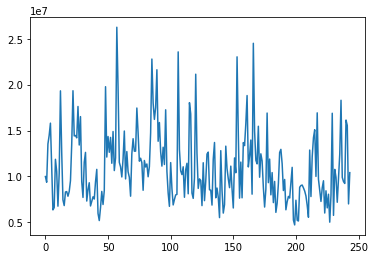

In [12]:
plt.plot(stock_df['Volume'])

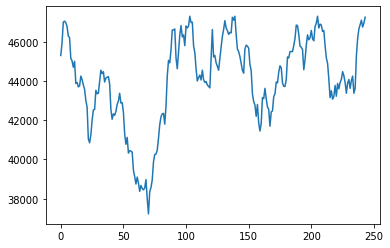

In [13]:
plt.plot(stock_df['average'])

In [14]:
stock = stock_df[['Volume','average']].values
stock.shape

(243, 2)

In [15]:
stock[0]

array([9987090.,   45300.])

# 정규화(속성별 평균 0, 표준편차 1)

In [16]:
stock = (stock - stock.min(axis=0)) / (stock.max(axis=0) - stock.min(axis=0))

In [17]:
stock[:2]

array([[0.24468409, 0.80148883],
       [0.21591388, 0.86600496]])

In [18]:
stock[:3]

array([[0.24468409, 0.80148883],
       [0.21591388, 0.86600496],
       [0.40950773, 0.97022333]])

# 학습용 데이터 생성

In [19]:
len(stock)

243

In [20]:
stock[0:50]

array([[0.24468409, 0.80148883],
       [0.21591388, 0.86600496],
       [0.40950773, 0.97022333],
       [0.45314991, 0.9751861 ],
       [0.51479518, 0.96774194],
       [0.30427456, 0.94789082],
       [0.0760424 , 0.90074442],
       [0.08775248, 0.89081886],
       [0.33189217, 0.7866005 ],
       [0.27054954, 0.77419355],
       [0.09482278, 0.74193548],
       [0.26113262, 0.77171216],
       [0.67822938, 0.66004963],
       [0.36790293, 0.66501241],
       [0.12616627, 0.6426799 ],
       [0.0978971 , 0.64764268],
       [0.16663867, 0.69727047],
       [0.16856703, 0.67990074],
       [0.14510995, 0.65260546],
       [0.16902777, 0.63027295],
       [0.22351818, 0.57320099],
       [0.40885115, 0.54094293],
       [0.67886237, 0.37965261],
       [0.45022282, 0.35980149],
       [0.45238914, 0.39950372],
       [0.44053392, 0.47394541],
       [0.59915505, 0.52605459],
       [0.40422233, 0.52853598],
       [0.54787834, 0.62531017],
       [0.2186683 , 0.60794045],
       [0.

In [21]:
stock[1:51]

array([[0.21591388, 0.86600496],
       [0.40950773, 0.97022333],
       [0.45314991, 0.9751861 ],
       [0.51479518, 0.96774194],
       [0.30427456, 0.94789082],
       [0.0760424 , 0.90074442],
       [0.08775248, 0.89081886],
       [0.33189217, 0.7866005 ],
       [0.27054954, 0.77419355],
       [0.09482278, 0.74193548],
       [0.26113262, 0.77171216],
       [0.67822938, 0.66004963],
       [0.36790293, 0.66501241],
       [0.12616627, 0.6426799 ],
       [0.0978971 , 0.64764268],
       [0.16663867, 0.69727047],
       [0.16856703, 0.67990074],
       [0.14510995, 0.65260546],
       [0.16902777, 0.63027295],
       [0.22351818, 0.57320099],
       [0.40885115, 0.54094293],
       [0.67886237, 0.37965261],
       [0.45022282, 0.35980149],
       [0.45238914, 0.39950372],
       [0.44053392, 0.47394541],
       [0.59915505, 0.52605459],
       [0.40422233, 0.52853598],
       [0.54787834, 0.62531017],
       [0.2186683 , 0.60794045],
       [0.13912525, 0.61042184],
       [0.

In [22]:
lookback = 50
X = []
y = []

for i in range(len(stock)-lookback):
    X.append(stock[i:i+lookback])
    y.append(stock[i+lookback,[1]])

In [23]:
X[0]

array([[0.24468409, 0.80148883],
       [0.21591388, 0.86600496],
       [0.40950773, 0.97022333],
       [0.45314991, 0.9751861 ],
       [0.51479518, 0.96774194],
       [0.30427456, 0.94789082],
       [0.0760424 , 0.90074442],
       [0.08775248, 0.89081886],
       [0.33189217, 0.7866005 ],
       [0.27054954, 0.77419355],
       [0.09482278, 0.74193548],
       [0.26113262, 0.77171216],
       [0.67822938, 0.66004963],
       [0.36790293, 0.66501241],
       [0.12616627, 0.6426799 ],
       [0.0978971 , 0.64764268],
       [0.16663867, 0.69727047],
       [0.16856703, 0.67990074],
       [0.14510995, 0.65260546],
       [0.16902777, 0.63027295],
       [0.22351818, 0.57320099],
       [0.40885115, 0.54094293],
       [0.67886237, 0.37965261],
       [0.45022282, 0.35980149],
       [0.45238914, 0.39950372],
       [0.44053392, 0.47394541],
       [0.59915505, 0.52605459],
       [0.40422233, 0.52853598],
       [0.54787834, 0.62531017],
       [0.2186683 , 0.60794045],
       [0.

In [24]:
X = np.array(X)
y = np.array(y)

X.shape, y.shape

((193, 50, 2), (193, 1))

In [25]:
stock[50]

array([0.36748863, 0.4044665 ])

In [26]:
stock[50,[1]]

array([0.4044665])

In [27]:
X_train = X[:-50-lookback]
X_test = X[-50:]
y_train = y[:-50-lookback]
y_test = y[-50:]

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((93, 50, 2), (50, 50, 2), (93, 1), (50, 1))

# 모델 생성

In [33]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, BatchNormalization

ModuleNotFoundError: No module named 'tensorflow.contrib'

In [31]:
model = Sequential()

model.add(BatchNormalization(axis=1, input_shape=X_train.shape[1:]))

model.add(LSTM(32, return_sequences=True, activation='relu'))
model.add(LSTM(32, return_sequences=True, activation='relu'))
model.add(LSTM(32))

model.add(Dense(1)) #예측한 주가

model.summary()

NameError: name 'Sequential' is not defined

In [ ]:
model.compile(loss='mse', optimizer='rmsprop', metrics=['acc'])

In [ ]:
git checkout 715221945416f312c253d88bf9ca2c1debef61d3

In [51]:
h = model.fit(X_train, y_train, batch_size=32, epochs=200, validation_data=[X_test, y_test])

Epoch 1/200
3/3 [==============================] - ETA: 0s - loss: 0.0379 - acc: 0.0323    

ValueError: in user code:

    C:\ProgramData\Anaconda3\envs\tensorflow-cpu\lib\site-packages\tensorflow\python\keras\engine\training.py:1233 test_function  *
        return step_function(self, iterator)
    C:\ProgramData\Anaconda3\envs\tensorflow-cpu\lib\site-packages\tensorflow\python\keras\engine\training.py:1224 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\ProgramData\Anaconda3\envs\tensorflow-cpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\ProgramData\Anaconda3\envs\tensorflow-cpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\ProgramData\Anaconda3\envs\tensorflow-cpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\ProgramData\Anaconda3\envs\tensorflow-cpu\lib\site-packages\tensorflow\python\keras\engine\training.py:1217 run_step  **
        outputs = model.test_step(data)
    C:\ProgramData\Anaconda3\envs\tensorflow-cpu\lib\site-packages\tensorflow\python\keras\engine\training.py:1183 test_step
        y_pred = self(x, training=False)
    C:\ProgramData\Anaconda3\envs\tensorflow-cpu\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\ProgramData\Anaconda3\envs\tensorflow-cpu\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:204 assert_input_compatibility
        raise ValueError('Layer ' + layer_name + ' expects ' +

    ValueError: Layer sequential_1 expects 1 input(s), but it received 2 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 50, 2) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 1) dtype=float32>]
